### Load preprocessed data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (24,12)



otomoto_df = pd.read_csv('preprocessed_data.csv')

In [2]:
otomoto_df.head()

,Unnamed: 0,link,condition,features,state,year,mileage_km,engine_power,engine_capacity,fuel_type,price,make,model,category,origin,gearbox,transmission,private_business,is_outlier
0,0,https://www.otomoto.pl/oferta/dacia-logan-1-5-...,Crashed,['velour-interior'],Używane,2013,103000.0,75.0,1500.0,diesel,7000.0,dacia,logan,sedan,Unknown,manual,front-wheel,business,False
1,1,https://www.otomoto.pl/oferta/dacia-dokker-sal...,No Information,"['asr', 'bluetooth', 'aux-in', 'usb-socket', '...",Używane,2018,136672.0,90.0,1500.0,diesel,34000.0,dacia,dokker,combi,pl,manual,front-wheel,business,False
2,2,https://www.otomoto.pl/oferta/dacia-sandero-se...,Not Crashed,"['alarm', 'roof-bars', 'cd', 'mp3', 'air-condi...",Używane,2012,138000.0,75.0,1100.0,petrol,15900.0,dacia,sandero,city-car,d,manual,front-wheel,business,False
3,3,https://www.otomoto.pl/oferta/dacia-sandero-st...,Not Crashed,"['alloy-wheels', 'cd', 'aux-in', 'air-conditio...",Używane,2010,244000.0,87.0,1600.0,petrol,14900.0,dacia,sandero-stepway,city-car,Unknown,manual,front-wheel,private,False
4,4,https://www.otomoto.pl/oferta/dacia-dokker-1-6...,Crashed,"['cd', 'alarm', 'bluetooth', 'usb-socket', 'is...",Używane,2013,120100.0,84.0,1600.0,petrol-lpg,19300.0,dacia,dokker,minivan,pl,manual,front-wheel,business,False


In [3]:
otomoto_df.columns

Index(['Unnamed: 0', 'link', 'condition', 'features', 'state', 'year',
       'mileage_km', 'engine_power', 'engine_capacity', 'fuel_type', 'price',
       'make', 'model', 'category', 'origin', 'gearbox', 'transmission',
       'private_business', 'is_outlier'],
      dtype='object')

In [4]:
to_drop = ['Unnamed: 0', 'link', 'features', 'is_outlier']
otomoto_df.drop(to_drop, axis=1, inplace=True)

In [5]:
otomoto_df.shape

(99040, 15)

In [6]:
otomoto_df.head()

,condition,state,year,mileage_km,engine_power,engine_capacity,fuel_type,price,make,model,category,origin,gearbox,transmission,private_business
0,Crashed,Używane,2013,103000.0,75.0,1500.0,diesel,7000.0,dacia,logan,sedan,Unknown,manual,front-wheel,business
1,No Information,Używane,2018,136672.0,90.0,1500.0,diesel,34000.0,dacia,dokker,combi,pl,manual,front-wheel,business
2,Not Crashed,Używane,2012,138000.0,75.0,1100.0,petrol,15900.0,dacia,sandero,city-car,d,manual,front-wheel,business
3,Not Crashed,Używane,2010,244000.0,87.0,1600.0,petrol,14900.0,dacia,sandero-stepway,city-car,Unknown,manual,front-wheel,private
4,Crashed,Używane,2013,120100.0,84.0,1600.0,petrol-lpg,19300.0,dacia,dokker,minivan,pl,manual,front-wheel,business


In [7]:
otomoto_df.dtypes

condition            object
state                object
year                  int64
mileage_km          float64
engine_power        float64
engine_capacity     float64
fuel_type            object
price               float64
make                 object
model                object
category             object
origin               object
gearbox              object
transmission         object
private_business     object
dtype: object

In [8]:
continous_variables_ls = otomoto_df.select_dtypes(['float64','int64']).columns
categorical_variables_ls = otomoto_df.select_dtypes('object').columns

In [9]:
continous_variables_ls

Index(['year', 'mileage_km', 'engine_power', 'engine_capacity', 'price'], dtype='object')

In [10]:
categorical_variables_ls

Index(['condition', 'state', 'fuel_type', 'make', 'model', 'category',
       'origin', 'gearbox', 'transmission', 'private_business'],
      dtype='object')

In [11]:
otomoto_df[continous_variables_ls].corr()

,year,mileage_km,engine_power,engine_capacity,price
year,1.000000,-0.738099,0.159754,-0.180783,0.609683
mileage_km,-0.738099,1.000000,-0.085314,0.219968,-0.543796
engine_power,0.159754,-0.085314,1.000000,0.796463,0.611292
engine_capacity,-0.180783,0.219968,0.796463,1.000000,0.300694
price,0.609683,-0.543796,0.611292,0.300694,1.000000


### Train test split

In [12]:
Y = otomoto_df["price"]
X = otomoto_df.drop('price', axis=1)
#X = otomoto_df[['year', 'mileage_km', 'engine_power', 'state_Nowe', 'state_Używane']]
#Y.reset_index(inplace=True, drop=True)
#X.reset_index(inplace=True, drop=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

X_train.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)

X_test.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True)

In [13]:
X_train

,condition,state,year,mileage_km,engine_power,engine_capacity,fuel_type,make,model,category,origin,gearbox,transmission,private_business
0,No Information,Używane,2017,20400.0,190.0,2400.0,petrol,honda,accord,sedan,Unknown,automatic,front-wheel,business
1,No Information,Używane,2006,243600.0,105.0,1900.0,diesel,volkswagen,golf,compact,nl,manual,front-wheel,business
2,No Information,Używane,2008,246309.0,233.0,3000.0,diesel,audi,a6-allroad,combi,Unknown,automatic,all-wheel,private
3,Not Crashed,Nowe,2022,5.0,190.0,2000.0,petrol,volkswagen,passat,combi,pl,automatic,front-wheel,business
4,No Information,Używane,2018,124563.0,95.0,1500.0,diesel,ford,focus,combi,pl,manual,front-wheel,business
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79227,No Information,Używane,2017,49073.0,136.0,1600.0,diesel,opel,insignia,city-car,Unknown,manual,front-wheel,business
79228,Not Crashed,Używane,2015,94924.0,125.0,2000.0,diesel,toyota,rav4,suv,i,manual,all-wheel,business
79229,Not Crashed,Używane,2008,279000.0,115.0,2000.0,diesel,renault,trafic,minivan,pl,manual,front-wheel,business
79230,No Information,Używane,2013,131000.0,90.0,1500.0,diesel,dacia,sandero-stepway,city-car,Unknown,manual,front-wheel,private


### Univariate Linear Regression

In [14]:
X_train.join(y_train).corr()['price']

year               0.612023
mileage_km        -0.545738
engine_power       0.610152
engine_capacity    0.296864
price              1.000000
Name: price, dtype: float64

<AxesSubplot:>

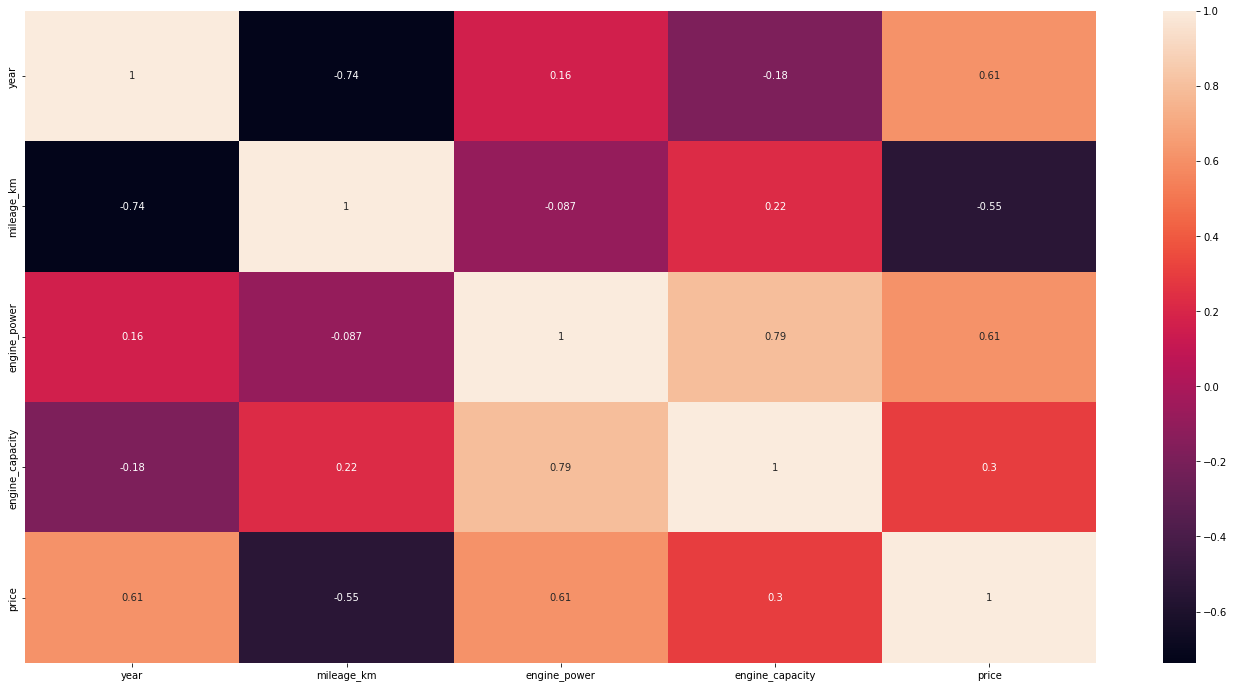

In [15]:
sns.heatmap(
    X_train.join(y_train).corr(),
    annot=True,
)

let's make only univarate linear regression with single feature: engine_power which is the most correlated with target variable: price

<AxesSubplot:xlabel='engine_power', ylabel='price'>

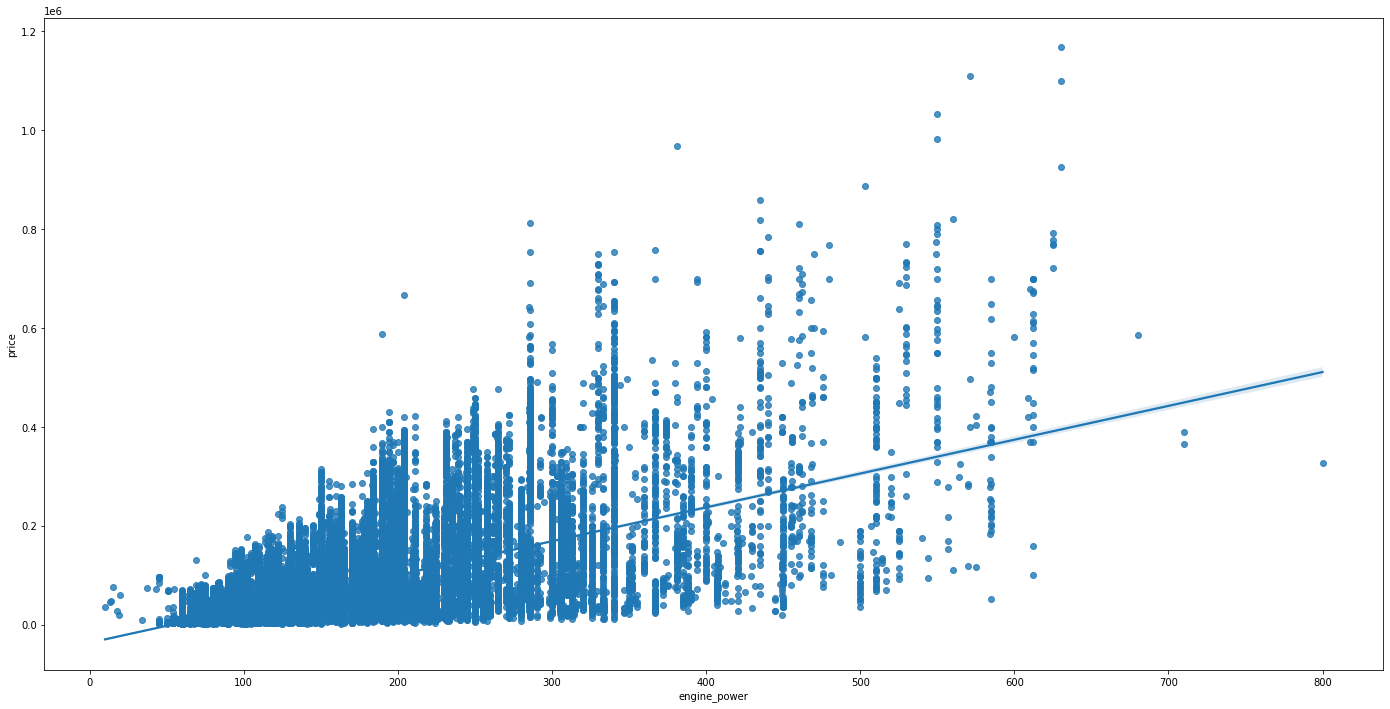

In [16]:
sns.regplot(x = 'engine_power',
           y = 'price',
           data = X_train.join(y_train))

In [17]:
import statsmodels.api as sm

X_train = sm.add_constant(X_train)
lr_uni_model = sm.OLS(y_train, X_train[['const','engine_power']]).fit()
print(lr_uni_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                 4.699e+04
Date:                Sat, 30 Jul 2022   Prob (F-statistic):               0.00
Time:                        20:52:17   Log-Likelihood:            -9.8244e+05
No. Observations:               79232   AIC:                         1.965e+06
Df Residuals:                   79230   BIC:                         1.965e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -3.637e+04    517.808    -70.239   

In [18]:
from scipy.stats import boxcox

y_bc, lam, ci = boxcox(y_train, alpha=0.05)

# df['charges'] = y_bc
# it did not perform better for this model!
ci, lam

((-0.03343983447589814, -0.020735048702230092), -0.0270875735268735)

(array([   43.,   520.,  3215.,  9867., 19396., 21004., 15759.,  7317.,
         1960.,   151.]),
 array([ 6.54785943,  7.0562211 ,  7.56458277,  8.07294444,  8.58130611,
         9.08966778,  9.59802945, 10.10639112, 10.61475279, 11.12311446,
        11.63147613]),
 <BarContainer object of 10 artists>)

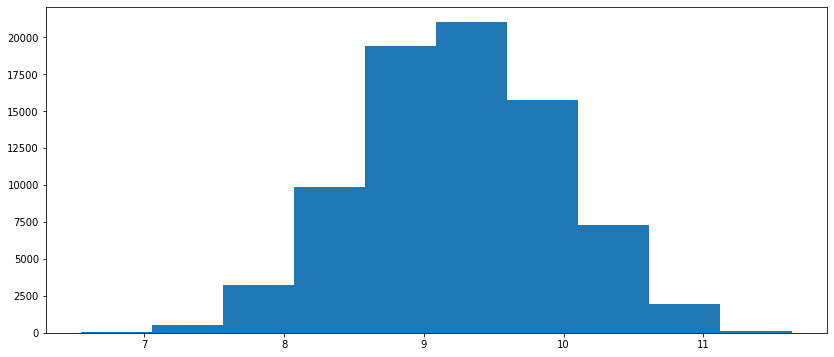

In [19]:
plt.figure(figsize=(14,6))
plt.hist(y_bc)

In [20]:
from scipy import stats

print(f"Test normalość dla zmiennej po transformacji Box Coxa: \n{stats.shapiro(y_bc)}")
print(
    f"Test normalość dla zmiennej po prostej transformacji logarytmicznej: \n{stats.shapiro(np.log(y_train))}"
)

Test normalość dla zmiennej po transformacji Box Coxa: 
ShapiroResult(statistic=0.9989294409751892, pvalue=8.065121640110691e-21)
Test normalość dla zmiennej po prostej transformacji logarytmicznej: 
ShapiroResult(statistic=0.998529851436615, pvalue=1.3325642528752557e-24)


/opt/anaconda3/envs/otomoto_crawler/lib/python3.8/site-packages/scipy/stats/_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [21]:
y_predict = lr_uni_model.predict(X_train[['engine_power','const']])

In [22]:
from sklearn import metrics

metrics.mean_squared_error(y_train, y_predict, squared=False)

6044207.5770250475

Text(0.5, 1.0, 'Waga ze zbioru testowa Vs predykcja wagi na nowych danych')

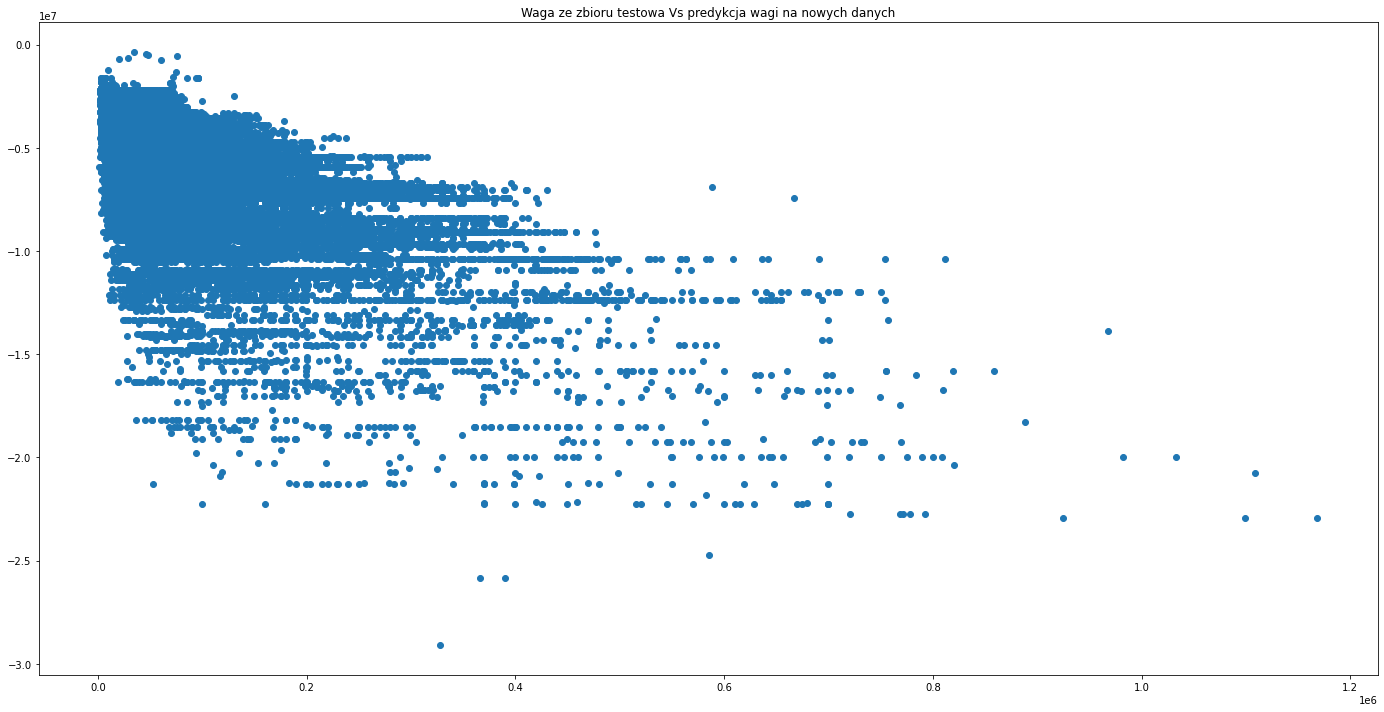

In [23]:
plt.scatter(y_train, y_predict)
plt.title("Waga ze zbioru testowa Vs predykcja wagi na nowych danych")

/opt/anaconda3/envs/otomoto_crawler/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram reszt')

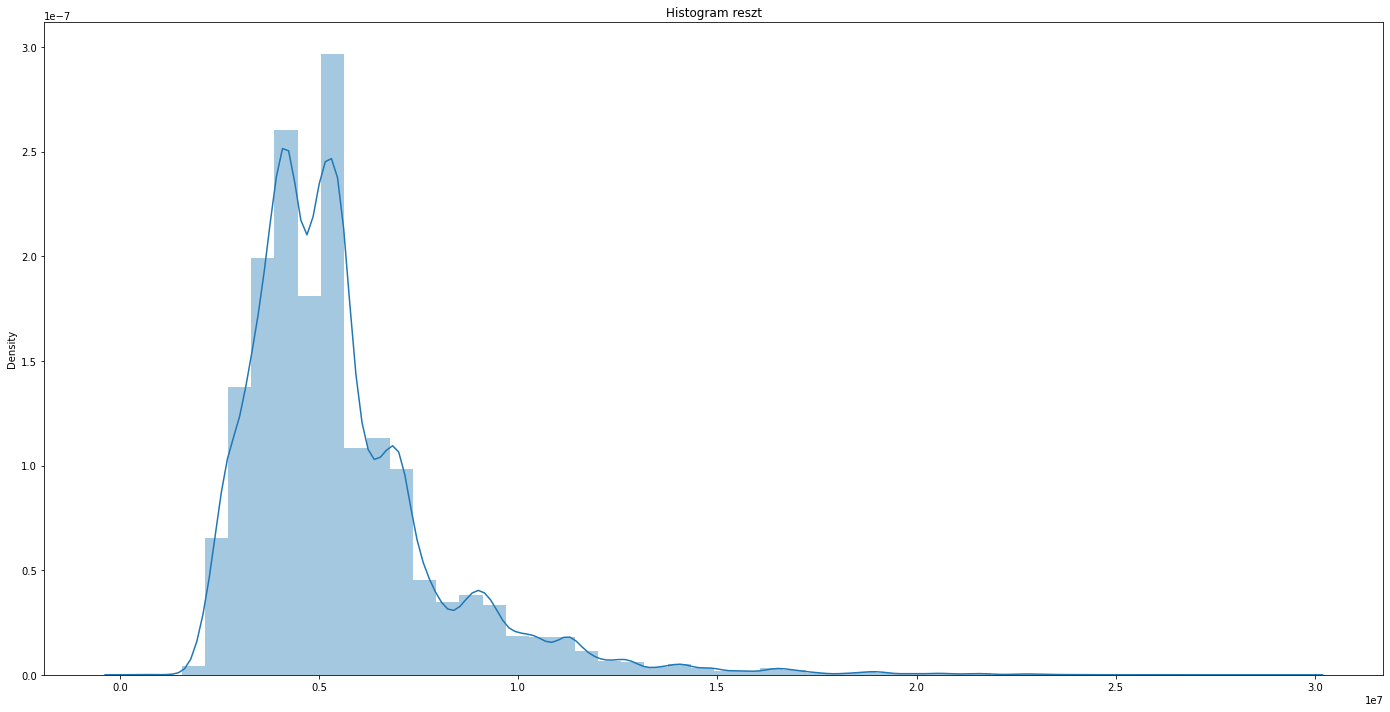

In [24]:
sns.distplot((y_train-y_predict))
plt.title("Histogram reszt")

Text(0.5, 1.0, 'Test wielorakiej normaloności (Check for Multivariate Normality): \nQ-Q Plot')

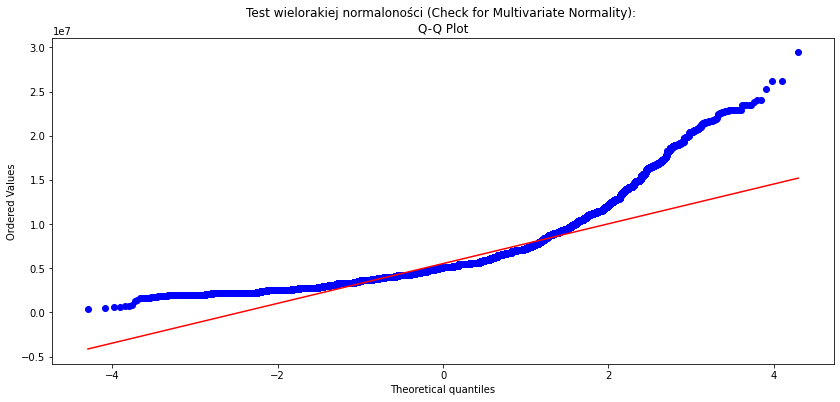

In [25]:
# Check for Multivariate Normality
# Quantile-Quantile plot 
f,ax = plt.subplots(1,1,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_train - y_predict),fit=True,plot=ax)
ax.set_title('Test wielorakiej normaloności (Check for Multivariate Normality): \nQ-Q Plot')


### Multivariate linear regression only contionous variables with PCA transformation

In [26]:
continous_variables_ls = continous_variables_ls.tolist()
continous_variables_ls.remove('price')
continous_variables_ls

['year', 'mileage_km', 'engine_power', 'engine_capacity']

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardizing the features

scaler = StandardScaler()
X_train_rescaled = scaler.fit_transform(X_train[continous_variables_ls])

X_train_rescaled = pd.concat(
    [
        pd.DataFrame(X_train_rescaled, columns=X_train[continous_variables_ls].columns),
        X_train.loc[:, ~X_train.columns.isin(continous_variables_ls)],
    ],
    axis=1,
)

pca = PCA(n_components=0.95, random_state=42)
pca.fit(X_train_rescaled[continous_variables_ls])
X_train_pca_reduced = pca.transform(X_train_rescaled[continous_variables_ls])

np.cumsum(pca.explained_variance_ratio_)

array([0.46864577, 0.89960832, 0.96549698])

In [28]:
X_test_rescaled = scaler.transform(X_test[continous_variables_ls])
X_test_pca_reduced = pca.transform(X_test_rescaled)

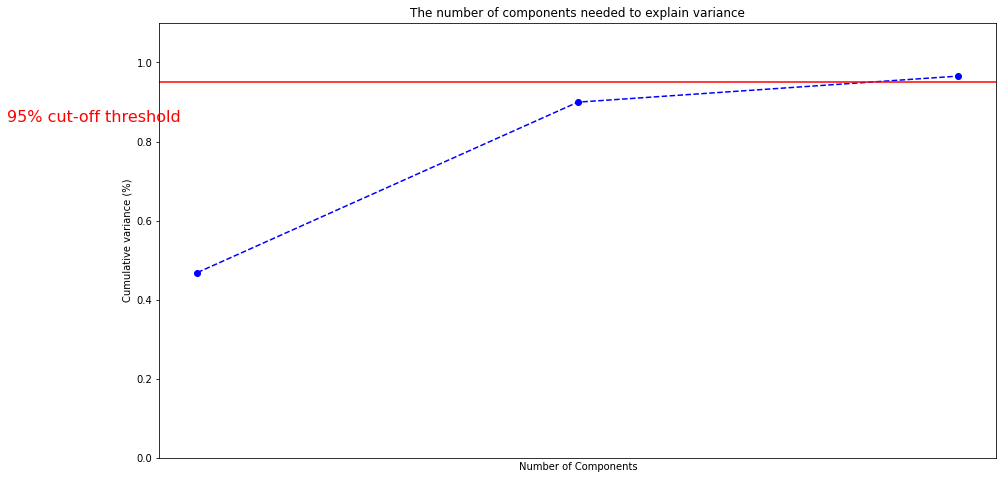

In [29]:
fig, ax = plt.subplots(figsize=(15, 8))

xi = np.arange(1, X_train_pca_reduced.shape[1] + 1, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0, 1.1)
plt.plot(xi, y, marker="o", linestyle="--", color="b")

plt.xlabel("Number of Components")
plt.xticks(
    np.arange(0, X_train_pca_reduced.shape[1] + 1, step=200)
)  # change from 0-based array index to 1-based human-readable label
plt.ylabel("Cumulative variance (%)")
plt.title("The number of components needed to explain variance")

plt.axhline(y=0.95, color="r", linestyle="-")
plt.text(0.5, 0.85, "95% cut-off threshold", color="red", fontsize=16)
ax.grid(axis="x")
plt.show()

In [30]:
X_train_pca_reduced = sm.add_constant(X_train_pca_reduced)
lr_pca_model = sm.OLS(y_train, X_train_pca_reduced).fit()
print(lr_pca_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                 5.053e+04
Date:                Sat, 30 Jul 2022   Prob (F-statistic):               0.00
Time:                        20:52:19   Log-Likelihood:            -9.5853e+05
No. Observations:               79232   AIC:                         1.917e+06
Df Residuals:                   79228   BIC:                         1.917e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.636e+04    154.273    430.160      0.0

In [31]:
import math

def model_prediction(model, X_features, y_target):
    error_dict = {}
    y_hat = model.predict(X_features)
    mse = metrics.mean_squared_error(y_target, y_hat)
    rmse = np.sqrt(mse)
    mae = metrics.mean_absolute_error(y_target, y_hat)
    r2 = metrics.r2_score(y_target, y_hat)
    error_dict["Errors"] = {"MSE": mse, "RMSE": rmse, "MAE": mae, "R2": r2}
    return error_dict

def log_model_prediction(model, X_features, y_target):
    error_dict = {}
    #y_target = np.log(y_target)
    y_hat = np.exp(model.predict(X_features))
    mse = metrics.mean_squared_error(y_target, y_hat)
    rmse = np.sqrt(mse)
    mae = metrics.mean_absolute_error(y_target, y_hat)
    r2 = metrics.r2_score(y_target, y_hat)
    error_dict["Errors"] = {
       "MSE": mse,
       "RMSE": rmse,
       "MAE": mae,
       'R2': r2
    }
    return error_dict

In [32]:
#y_train_predict = lr_pca_model.predict(X_train_pca_reduced)
results_train_pca_lr = model_prediction(lr_pca_model, X_train_pca_reduced, y_train)
results_train_pca_lr

{'Errors': {'MSE': 1885648762.475976,
  'RMSE': 43424.05741609109,
  'MAE': 26610.00993869096,
  'R2': 0.65673764699792}}

In [33]:
X_test_pca_reduced = sm.add_constant(X_test_pca_reduced)
results_test_pca_lr = model_prediction(lr_pca_model, X_test_pca_reduced, y_test)
results_test_pca_lr

{'Errors': {'MSE': 2022138811.6122704,
  'RMSE': 44968.1977803455,
  'MAE': 27143.778322745296,
  'R2': 0.6530652092185104}}

Text(0.5, 1.0, 'Waga ze zbioru testowa Vs predykcja wagi na nowych danych')

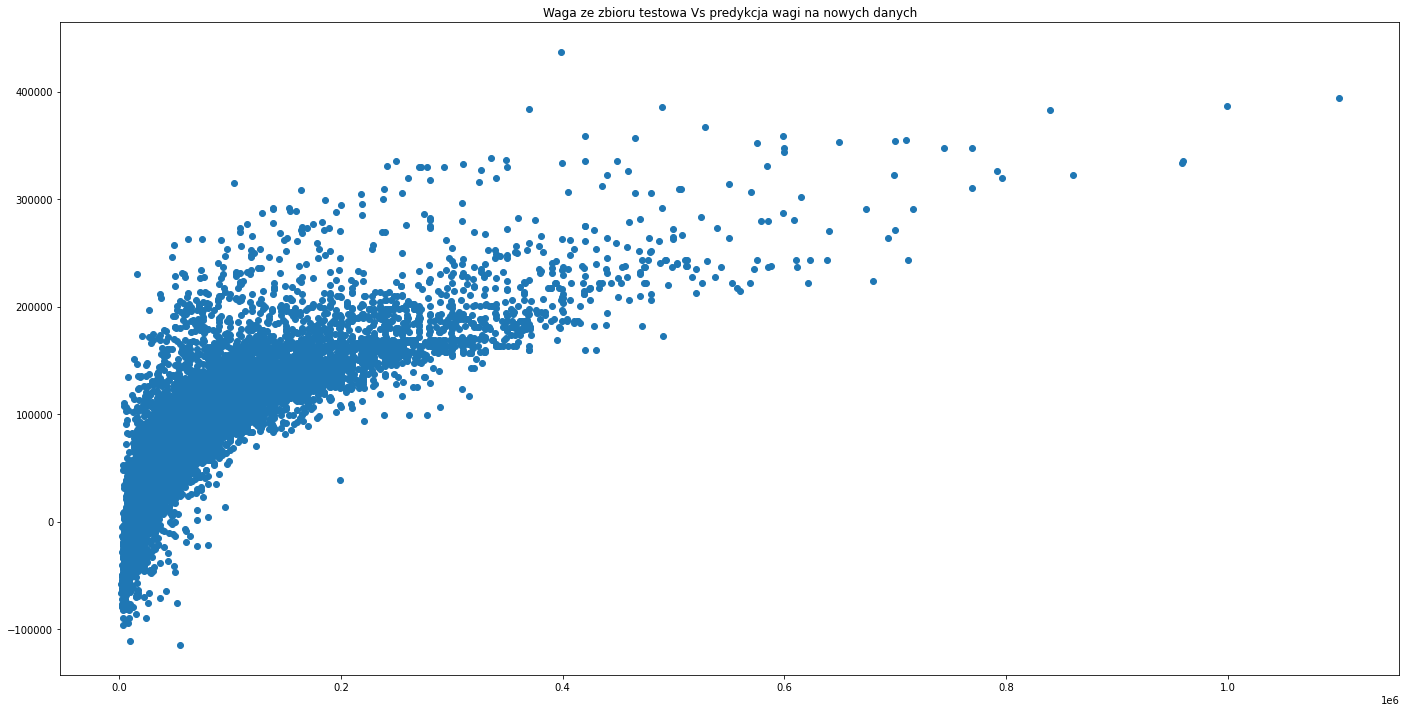

In [34]:
plt.scatter(y_test, lr_pca_model.predict(X_test_pca_reduced))
plt.title("Waga ze zbioru testowa Vs predykcja wagi na nowych danych")

In [35]:
#X_train_pca_reduced = sm.add_constant(X_train_pca_reduced)
lr_log_pca_model = sm.OLS(np.log(y_train), X_train_pca_reduced).fit()
print(lr_log_pca_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                 1.473e+05
Date:                Sat, 30 Jul 2022   Prob (F-statistic):               0.00
Time:                        20:52:19   Log-Likelihood:                -32839.
No. Observations:               79232   AIC:                         6.569e+04
Df Residuals:                   79228   BIC:                         6.572e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.6612      0.001   8193.720      0.0

In [36]:
results_train_log_pca_lr = log_model_prediction(lr_log_pca_model, X_train_pca_reduced, y_train)
results_train_log_pca_lr

{'Errors': {'MSE': 2855327579.191998,
  'RMSE': 53435.26531413499,
  'MAE': 19068.479240180193,
  'R2': 0.4802179054076804}}

In [37]:
results_test_log_pca_lr = log_model_prediction(lr_log_pca_model, X_test_pca_reduced, y_test)
results_test_log_pca_lr

{'Errors': {'MSE': 2808250103.143985,
  'RMSE': 52992.92502913936,
  'MAE': 19154.783893468855,
  'R2': 0.5181934808819814}}

Text(0.5, 1.0, 'Cena ze zbioru testowa vs predykcja ceny na nowych danych')

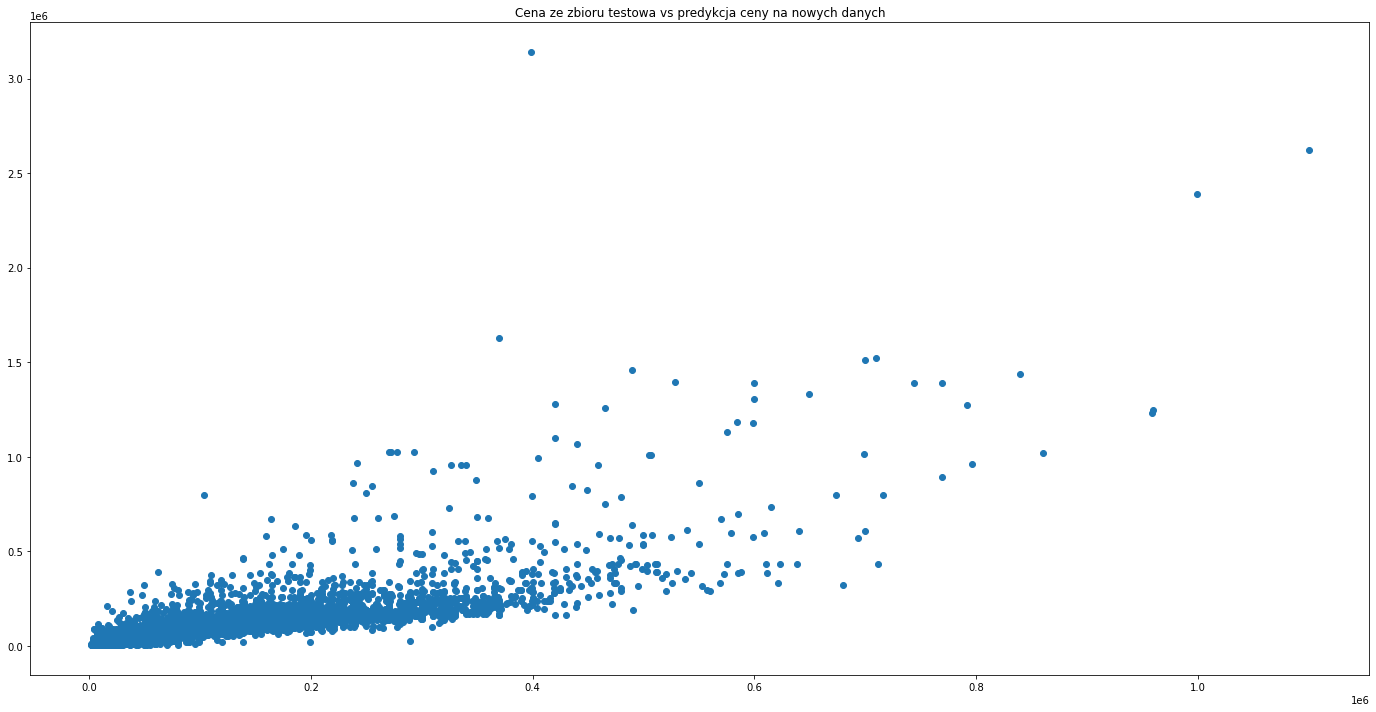

In [38]:
plt.scatter(y_test, np.exp(lr_log_pca_model.predict(X_test_pca_reduced)))
plt.title("Cena ze zbioru testowa vs predykcja ceny na nowych danych")

/opt/anaconda3/envs/otomoto_crawler/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram reszt')

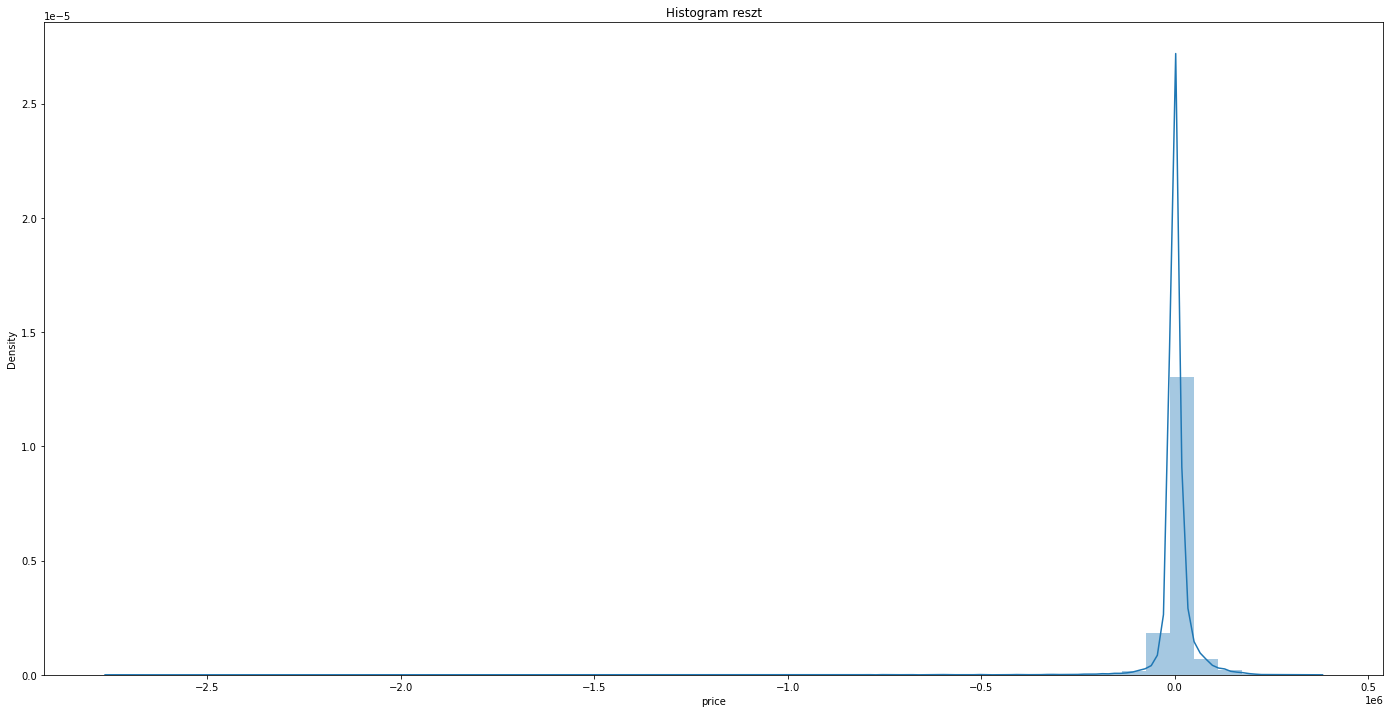

In [39]:
sns.distplot((y_test-np.exp(lr_log_pca_model.predict(X_test_pca_reduced))))
plt.title("Histogram reszt")

In [40]:
X_train_strange_points = X_train[continous_variables_ls]

In [41]:
X_train_strange_points['train_prediction'] = np.exp(lr_log_pca_model.predict(X_train_pca_reduced))
X_train_strange_points = X_train_strange_points.join(y_train)

/var/folders/ym/_gh6nz0s645_5m7746np3tf80000gn/T/ipykernel_1817/52084128.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_strange_points['train_prediction'] = np.exp(lr_log_pca_model.predict(X_train_pca_reduced))


In [42]:
X_train_strange_points[X_train_strange_points['train_prediction']>2000000]

,year,mileage_km,engine_power,engine_capacity,train_prediction,price
21241,2022,1.0,625.0,4400.0,2.227434e+06,721000.0
30520,2020,10300.0,710.0,6200.0,3.543995e+06,390000.0
31340,2022,0.0,630.0,4000.0,2.144585e+06,1168053.0
40127,2021,23.0,800.0,4000.0,4.452338e+06,328000.0
45700,2022,1.0,625.0,4400.0,2.227434e+06,768400.0
48863,2022,1.0,625.0,4400.0,2.227434e+06,771000.0
50904,2022,1.0,625.0,4400.0,2.227434e+06,778500.0
50997,2018,33733.0,710.0,6200.0,2.741783e+06,365854.0


### One-hot encoding for categorical variables

In [43]:
categorical_variables_ls

Index(['condition', 'state', 'fuel_type', 'make', 'model', 'category',
       'origin', 'gearbox', 'transmission', 'private_business'],
      dtype='object')

In [54]:
otomoto_encoded_df = pd.get_dummies(data=otomoto_df[categorical_variables_ls], drop_first=True)
otomoto_encoded_df = otomoto_encoded_df.join(otomoto_df[continous_variables_ls])
otomoto_encoded_df = otomoto_encoded_df.join(otomoto_df['price'])
otomoto_encoded_df.shape

(99040, 333)

In [55]:
otomoto_encoded_df.head()

,condition_No Information,condition_Not Crashed,state_Używane,fuel_type_electric,fuel_type_hybrid,fuel_type_petrol,fuel_type_petrol-cng,fuel_type_petrol-lpg,make_audi,make_bmw,...,gearbox_manual,transmission_all-wheel,transmission_front-wheel,transmission_rear-wheel,private_business_private,year,mileage_km,engine_power,engine_capacity,price
0,0,0,1,0,0,0,0,0,0,0,...,1,0,1,0,0,2013,103000.0,75.0,1500.0,7000.0
1,1,0,1,0,0,0,0,0,0,0,...,1,0,1,0,0,2018,136672.0,90.0,1500.0,34000.0
2,0,1,1,0,0,1,0,0,0,0,...,1,0,1,0,0,2012,138000.0,75.0,1100.0,15900.0
3,0,1,1,0,0,1,0,0,0,0,...,1,0,1,0,1,2010,244000.0,87.0,1600.0,14900.0
4,0,0,1,0,0,0,0,1,0,0,...,1,0,1,0,0,2013,120100.0,84.0,1600.0,19300.0


In [56]:
Y = otomoto_encoded_df["price"]
X = otomoto_encoded_df.drop('price', axis=1)
#X = otomoto_df[['year', 'mileage_km', 'engine_power', 'state_Nowe', 'state_Używane']]
#Y.reset_index(inplace=True, drop=True)
#X.reset_index(inplace=True, drop=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

X_train.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)

X_test.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True)

In [60]:
X_train[continous_variables_ls].join(y_train).corr()

,year,mileage_km,engine_power,engine_capacity,price
year,1.000000,-0.736626,0.161997,-0.181835,0.612023
mileage_km,-0.736626,1.000000,-0.086890,0.221070,-0.545738
engine_power,0.161997,-0.086890,1.000000,0.792949,0.610152
engine_capacity,-0.181835,0.221070,0.792949,1.000000,0.296864
price,0.612023,-0.545738,0.610152,0.296864,1.000000


In [62]:
X_train_full = X_train.drop(['engine_capacity','mileage_km'], axis=1)

In [63]:
X_test_full = X_test.drop(['engine_capacity','mileage_km'], axis=1)

In [66]:
X_train_full = sm.add_constant(X_train_full)
lr_full_model = sm.OLS(y_train, X_train_full).fit()
print(lr_full_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     878.2
Date:                Sat, 30 Jul 2022   Prob (F-statistic):               0.00
Time:                        21:00:29   Log-Likelihood:            -9.4076e+05
No. Observations:               79232   AIC:                         1.882e+06
Df Residuals:                   78911   BIC:                         1.885e+06
Df Model:                         320                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [92]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

fs = SelectKBest(score_func=f_regression, k=5)
fs.fit(X_train_full, y_train)
cols = fs.get_support(indices=True)
anova_feature_selection_dict = {}
for i in range(len(fs.scores_)):
    anova_feature_selection_dict[X_train_full.columns[i]] = round(fs.scores_[i], 3)

anova_feature_selection_dict = dict(
    sorted(anova_feature_selection_dict.items(), key=lambda item: item[1], reverse=True)
)
anova_feature_selection_dict

/opt/anaconda3/envs/otomoto_crawler/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/opt/anaconda3/envs/otomoto_crawler/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/envs/otomoto_crawler/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:307: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom


{'const': nan,
 'state_Używane': 22454.672,
 'condition_Not Crashed': 3328.46,
 'make_porsche': 2856.429,
 'category_city-car': 2609.655,
 'make_mercedes-benz': 2482.062,
 'fuel_type_hybrid': 2457.901,
 'condition_No Information': 2109.745,
 'make_land-rover': 2055.235,
 'model_gle': 1860.147,
 'make_bmw': 1539.249,
 'category_compact': 1446.463,
 'model_x5': 1367.938,
 'make_opel': 1288.268,
 'model_glc': 1234.436,
 'make_audi': 1073.812,
 'model_cayenne': 817.477,
 'fuel_type_petrol-lpg': 713.525,
 'model_a7': 699.877,
 'model_f-pace': 670.954,
 'make_jaguar': 613.734,
 'model_astra': 557.474,
 'model_arteon': 543.273,
 'model_wrangler': 541.464,
 'make_renault': 516.997,
 'model_a6': 494.722,
 'make_citroen': 463.725,
 'model_a8': 455.712,
 'make_jeep': 441.176,
 'category_combi': 436.185,
 'make_ford': 401.836,
 'category_mini': 376.007,
 'model_giulia': 316.948,
 'model_xc-60': 315.083,
 'model_x6': 312.513,
 'model_corsa': 312.184,
 'make_peugeot': 293.292,
 'fuel_type_electric':

In [93]:
X_test_full = sm.add_constant(X_test_full)
#X_train_full = sm.add_constant(X_train_full)

In [94]:
X_train_full.shape

(79232, 331)

In [95]:
X_test_full.shape

(19808, 331)

In [96]:
cols

array([  3, 324, 325, 329, 330])

In [97]:
X_train_anova = fs.transform(X_train_full)
X_test_anova = fs.transform(X_test_full)
X_train_anova = pd.DataFrame(X_train_anova, columns=X_train_full.iloc[:,cols].columns)
X_test_anova = pd.DataFrame(X_test_anova, columns=X_test_full.iloc[:,cols].columns)

In [98]:
print("X_train.shape: {}".format(X_train.shape))
print("X_train_vth.shape: {}".format(X_train_full.shape))
print("X_train_selected.shape: {}".format(X_train_anova.shape))
# transform test data
#X_test_reg = fs.transform(X_test_vth)

X_train.shape: (79232, 332)
X_train_vth.shape: (79232, 331)
X_train_selected.shape: (79232, 5)


In [99]:
X_train_anova = sm.add_constant(X_train_anova)
lr_anova_model = sm.OLS(y_train, X_train_anova).fit()

In [100]:
print(lr_anova_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                 3.673e+04
Date:                Sat, 30 Jul 2022   Prob (F-statistic):               0.00
Time:                        21:09:14   Log-Likelihood:            -9.5337e+05
No. Observations:               79232   AIC:                         1.907e+06
Df Residuals:                   79226   BIC:                         1.907e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -1.08

In [101]:
lr_log_anova_model = sm.OLS(np.log(y_train), X_train_anova).fit()
print(lr_log_anova_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                 9.283e+04
Date:                Sat, 30 Jul 2022   Prob (F-statistic):               0.00
Time:                        21:09:21   Log-Likelihood:                -31191.
No. Observations:               79232   AIC:                         6.239e+04
Df Residuals:                   79226   BIC:                         6.245e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   -223

In [102]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X_train_anova.columns

vif_data["VIF"] = [
    variance_inflation_factor(X_train_anova.values, i)
    for i in range(len(X_train_anova.columns))
]

In [103]:
vif_data.sort_values(by="VIF", ascending=False)

,feature,VIF
0,const,170398.011872
5,engine_power,1.827365
2,gearbox_manual,1.669109
3,transmission_all-wheel,1.494579
4,year,1.324036
1,state_Używane,1.250059


In [105]:
log_model_prediction(lr_log_anova_model, X_train_anova, y_train)

{'Errors': {'MSE': 1321471192.2226532,
  'RMSE': 36352.045227506154,
  'MAE': 16798.639908730333,
  'R2': 0.7594401884944937}}

In [109]:
X_test_anova = sm.add_constant(X_test_anova)
log_model_prediction(lr_log_anova_model, X_test_anova, y_test)

{'Errors': {'MSE': 1191178134.3239756,
  'RMSE': 34513.448600856675,
  'MAE': 16742.518570457865,
  'R2': 0.7956316675976974}}

Text(0.5, 1.0, 'Cena ze zbioru testowa vs predykcja ceny na nowych danych')

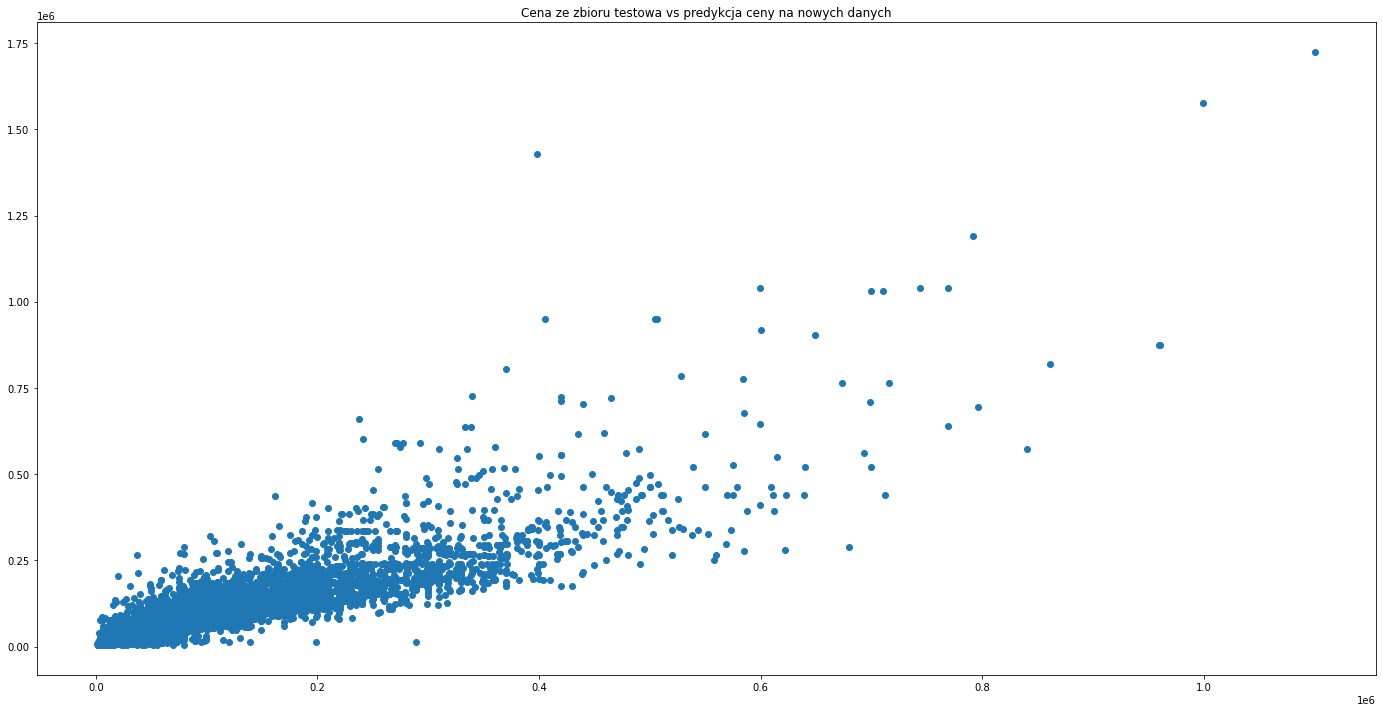

In [110]:
plt.scatter(y_test, np.exp(lr_log_anova_model.predict(X_test_anova)))
plt.title("Cena ze zbioru testowa vs predykcja ceny na nowych danych")

/opt/anaconda3/envs/otomoto_crawler/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram reszt')

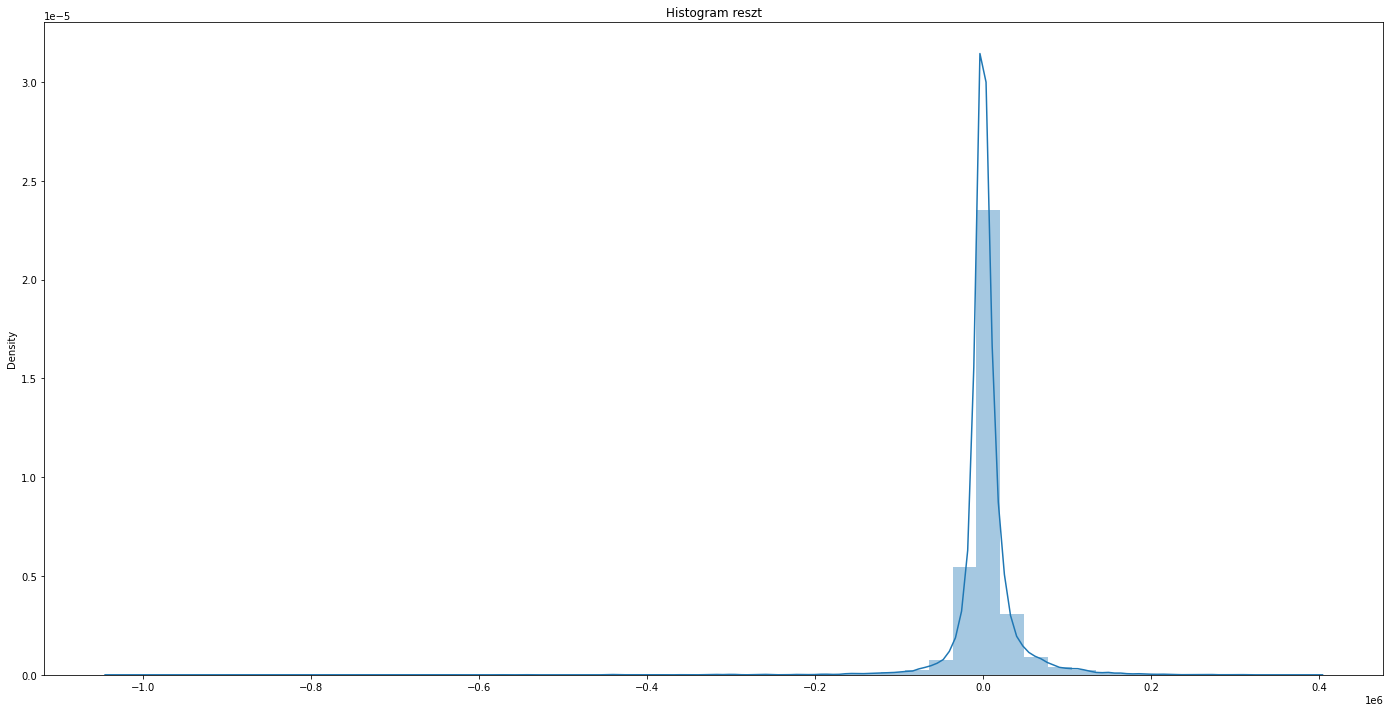

In [111]:
sns.distplot((y_test-np.exp(lr_log_anova_model.predict(X_test_anova))))
plt.title("Histogram reszt")

In [112]:
stats.shapiro((y_test-np.exp(lr_log_anova_model.predict(X_test_anova))))

/opt/anaconda3/envs/otomoto_crawler/lib/python3.8/site-packages/scipy/stats/_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.6560623645782471, pvalue=0.0)

### Random Forest model

In [114]:
from sklearn.preprocessing import LabelEncoder

# Encode Categorical Columns
le = LabelEncoder()

df_encoded = otomoto_df[categorical_variables_ls].apply(
    lambda col: le.fit_transform(col.astype(str)), axis=0, result_type='expand')

In [116]:
otomoto_tree_df = pd.concat([otomoto_df.drop(categorical_variables_ls, axis=1),
                             df_encoded], axis=1)
otomoto_tree_df
#otomoto_tree_original_df.drop('is_outlier', axis=1, inplace=True)

,year,mileage_km,engine_power,engine_capacity,price,condition,state,fuel_type,make,model,category,origin,gearbox,transmission,private_business
0,2013,103000.0,75.0,1500.0,7000.0,0,1,0,5,141,7,0,1,2,0
1,2018,136672.0,90.0,1500.0,34000.0,1,1,0,5,81,2,25,1,2,0
2,2012,138000.0,75.0,1100.0,15900.0,2,1,3,5,184,1,7,1,2,0
3,2010,244000.0,87.0,1600.0,14900.0,2,1,3,5,185,1,0,1,2,1
4,2013,120100.0,84.0,1600.0,19300.0,0,1,5,5,81,6,25,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99035,2010,148000.0,120.0,1600.0,25500.0,2,1,3,21,7,8,7,1,2,0
99036,2022,2.0,75.0,1200.0,64800.0,2,0,3,21,5,1,0,1,2,0
99037,2007,181171.0,68.0,1400.0,7900.0,2,1,0,21,4,1,0,1,2,1
99038,2007,154000.0,110.0,1600.0,5999.0,2,1,3,21,8,2,7,1,2,0


In [117]:
X = otomoto_tree_df.drop('price', axis=1)
Y = otomoto_tree_df['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

X_train.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)

X_test.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True)

In [118]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor


sel = SelectFromModel(RandomForestRegressor(n_estimators = 1000, oob_score=True, n_jobs=-1))
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestRegressor(n_estimators=1000, n_jobs=-1,
                                                oob_score=True))

In [119]:
sel.get_support()

array([ True, False,  True, False, False, False, False, False, False,
       False, False, False, False, False])

In [120]:
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

2

In [121]:
selected_feat

Index(['year', 'engine_power'], dtype='object')

In [ ]:
# # transform training set
# X_train_mbf = sel.transform(X_train)
# print(f'X_train.shape: {X_train.shape}')

# print(f'X_train_selected.shape: {X_train_mbf.shape}')

# # transform test data
# X_test_mbf = sel.transform(X_test)
# print(f'X_test.shape: {X_test.shape}')
# print(f'X_train_selected.shape: {X_test_mbf.shape}')

In [123]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 5)]

# Number of features to consider at every split
#max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [20, 50, 100]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [20, 50, 100, 500]

# Minimum number of samples required at each leaf node

# Method of selecting samples for training each tree
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               #'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split
              }
print(random_grid)

{'n_estimators': [200, 650, 1100, 1550, 2000], 'max_depth': [20, 50, 100, None], 'min_samples_split': [20, 50, 100, 500]}


In [125]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf,
                               param_distributions = random_grid,
                               n_iter = 10,
                               cv = 2,
                               verbose=5,
                               random_state=42,
                               n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV 2/2] END max_depth=50, min_samples_split=100, n_estimators=650;, score=0.910 total time= 1.5min
[CV 1/2] END max_depth=20, min_samples_split=100, n_estimators=200;, score=0.913 total time=  29.5s
[CV 1/2] END max_depth=None, min_samples_split=100, n_estimators=200;, score=0.913 total time=  29.0s
[CV 1/2] END max_depth=20, min_samples_split=20, n_estimators=2000;, score=0.936 total time= 4.4min
[CV 1/2] END max_depth=50, min_samples_split=100, n_estimators=650;, score=0.913 total time= 1.5min
[CV 2/2] END max_depth=20, min_samples_split=100, n_estimators=200;, score=0.910 total time=  29.5s
[CV 2/2] END max_depth=None, min_samples_split=100, n_estimators=200;, score=0.910 total time=  28.8s
[CV 2/2] END max_depth=20, min_samples_split=20, n_estimators=2000;, score=0.937 total time= 4.4min
[CV 2/2] END max_depth=50, min_samples_split=20, n_estimators=1100;, score=0.937 total time= 3.3min
[CV 1/2] END max_depth=50, min_samp

RandomizedSearchCV(cv=2, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [20, 50, 100, None],
                                        'min_samples_split': [20, 50, 100, 500],
                                        'n_estimators': [200, 650, 1100, 1550,
                                                         2000]},
                   random_state=42, verbose=5)

In [126]:
rf_random.best_score_

0.9363400601848368

In [127]:
rf_random.best_params_

{'n_estimators': 2000, 'min_samples_split': 20, 'max_depth': 20}

In [128]:
rf_random.best_estimator_.score(X_train, y_train)

0.9698626050633695

In [129]:
rf_random.best_estimator_.score(X_test, y_test)

0.9443636877006761

In [130]:
y_pred_train_rf = rf_random.predict(X_train)
y_pred_test_rf = rf_random.predict(X_test)

import sklearn.metrics as metrics

mse_train = metrics.mean_squared_error(y_train, y_pred_train_rf)
mae_train = metrics.mean_absolute_error(y_train, y_pred_train_rf)
rmse_train = np.sqrt(mse_train)

print(f"Training prediction results: \n MSE: {mse_train} \n MAE: {mae_train} \n RMSE: {rmse_train}")

Training prediction results: 
 MSE: 165554250.18065572 
 MAE: 6337.479498867731 
 RMSE: 12866.78865065622


In [131]:
mse_test = metrics.mean_squared_error(y_test, y_pred_test_rf)
mae_test = metrics.mean_absolute_error(y_test, y_pred_test_rf)
rmse_test = np.sqrt(mse_test)

print(f"testing prediction results: \n MSE: {mse_test} \n MAE: {mae_test} \n RMSE: {rmse_test}")

testing prediction results: 
 MSE: 324280958.3380834 
 MAE: 8330.091152228055 
 RMSE: 18007.80270710681


year : 0.483
mileage_km : 0.017
engine_power : 0.348
engine_capacity : 0.055
condition : 0.029
fuel_type : 0.007
make : 0.018
model : 0.014
category : 0.01
origin : 0.002
gearbox : 0.009
transmission : 0.007
private_business : 0.001



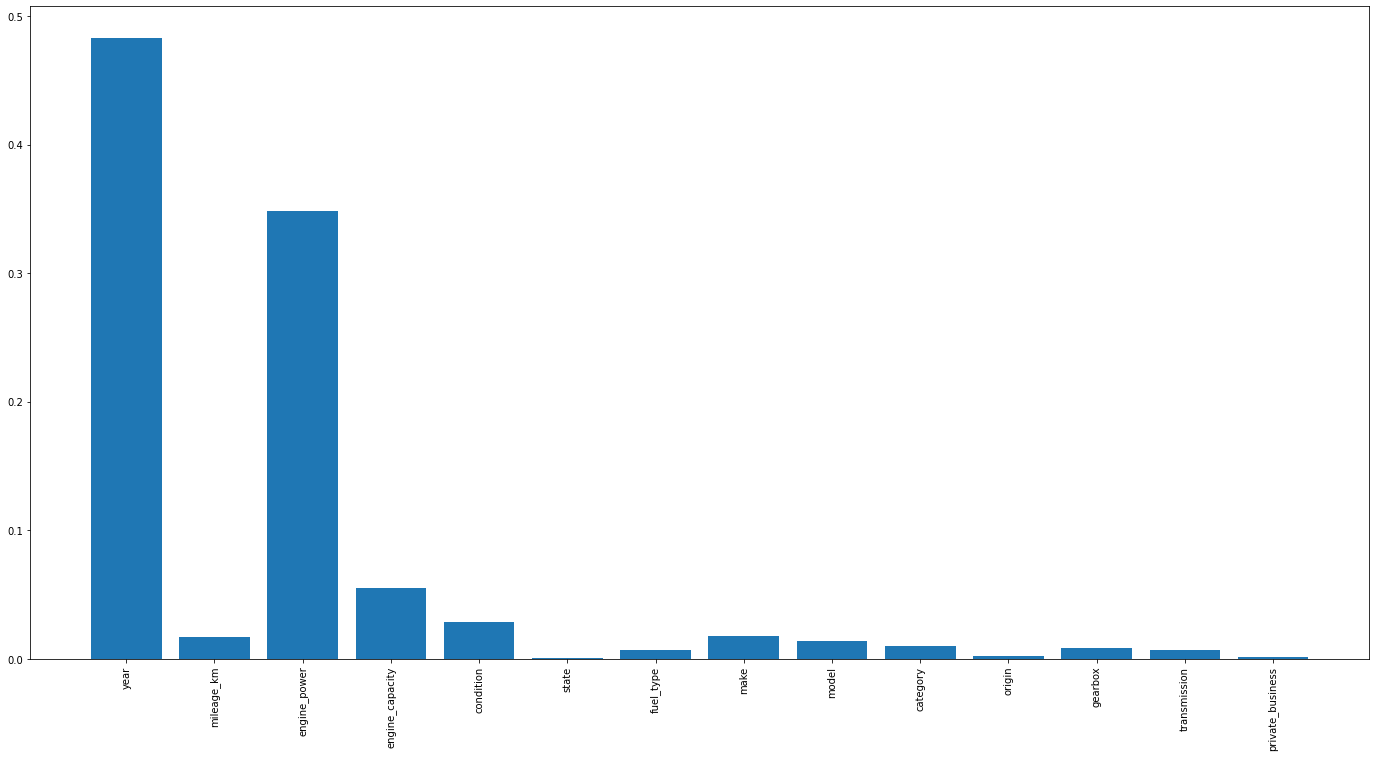

In [135]:
importances = rf_random.best_estimator_.feature_importances_
feature_names = [f'feature {i}' for i in range(X_test.shape[1])]

# what are scores for the features
for i in range(len(rf_random.best_estimator_.feature_importances_)):
    if rf_random.best_estimator_.feature_importances_[i] >0.001:
        print(f'{X_train.columns[i]} : {round(rf_random.best_estimator_.feature_importances_[i],3)}')

print()

plt.bar([X_train.columns[i] for i in range(len(rf_random.best_estimator_.feature_importances_))],
        rf_random.best_estimator_.feature_importances_)
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (24,12)
plt.show()

In [136]:
import joblib
# save
joblib.dump(rf_random, "random_forest_wo_features_newest.joblib")

# load
#loaded_rf = joblib.load("my_random_forest.joblib")



['random_forest_wo_features_newest.joblib']

In [137]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor


sel = SelectFromModel(RandomForestRegressor(n_estimators = 2000, oob_score=True, n_jobs=-1))
sel.fit(X_train, y_train)

selected_feat= X_train.columns[(sel.get_support())]
selected_feat

Index(['year', 'engine_power'], dtype='object')

In [138]:
# transform training set
X_train_mbf = sel.transform(X_train)
print(f'X_train.shape: {X_train.shape}')

print(f'X_train_selected.shape: {X_train_mbf.shape}')

# transform test data
X_test_mbf = sel.transform(X_test)
print(f'X_test.shape: {X_test.shape}')
print(f'X_train_selected.shape: {X_test_mbf.shape}')

X_train.shape: (79232, 14)
X_train_selected.shape: (79232, 2)
X_test.shape: (19808, 14)
X_train_selected.shape: (19808, 2)


In [140]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf,
                               param_distributions = random_grid,
                               n_iter = 10,
                               cv = 2,
                               verbose=5,
                               random_state=42,
                               n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train_mbf, y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV 2/2] END max_depth=50, min_samples_split=100, n_estimators=650;, score=0.858 total time=  17.2s
[CV 1/2] END max_depth=20, min_samples_split=100, n_estimators=200;, score=0.862 total time=   5.7s
[CV 1/2] END max_depth=None, min_samples_split=100, n_estimators=200;, score=0.862 total time=   5.8s
[CV 1/2] END max_depth=20, min_samples_split=20, n_estimators=2000;, score=0.872 total time=  46.4s
[CV 1/2] END max_depth=50, min_samples_split=100, n_estimators=650;, score=0.862 total time=  17.3s
[CV 2/2] END max_depth=20, min_samples_split=100, n_estimators=200;, score=0.859 total time=   5.8s
[CV 2/2] END max_depth=None, min_samples_split=100, n_estimators=200;, score=0.858 total time=   5.7s
[CV 2/2] END max_depth=20, min_samples_split=20, n_estimators=2000;, score=0.874 total time=  46.4s


RandomizedSearchCV(cv=2, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [20, 50, 100, None],
                                        'min_samples_split': [20, 50, 100, 500],
                                        'n_estimators': [200, 650, 1100, 1550,
                                                         2000]},
                   random_state=42, verbose=5)

In [142]:
y_pred_train_rf = rf_random.predict(X_train_mbf)
y_pred_test_rf = rf_random.predict(X_test_mbf)

import sklearn.metrics as metrics

mse_train = metrics.mean_squared_error(y_train, y_pred_train_rf)
mae_train = metrics.mean_absolute_error(y_train, y_pred_train_rf)
rmse_train = np.sqrt(mse_train)

print(f"Training prediction results: \n MSE: {mse_train} \n MAE: {mae_train} \n RMSE: {rmse_train}")

Training prediction results: 
 MSE: 586056250.9545964 
 MAE: 12909.173168669511 
 RMSE: 24208.598698697875


In [143]:
mse_test = metrics.mean_squared_error(y_test, y_pred_test_rf)
mae_test = metrics.mean_absolute_error(y_test, y_pred_test_rf)
rmse_test = np.sqrt(mse_test)

print(f"testing prediction results: \n MSE: {mse_test} \n MAE: {mae_test} \n RMSE: {rmse_test}")

testing prediction results: 
 MSE: 677875047.9231769 
 MAE: 13438.25313635397 
 RMSE: 26036.033644224248


year : 0.533
engine_power : 0.467



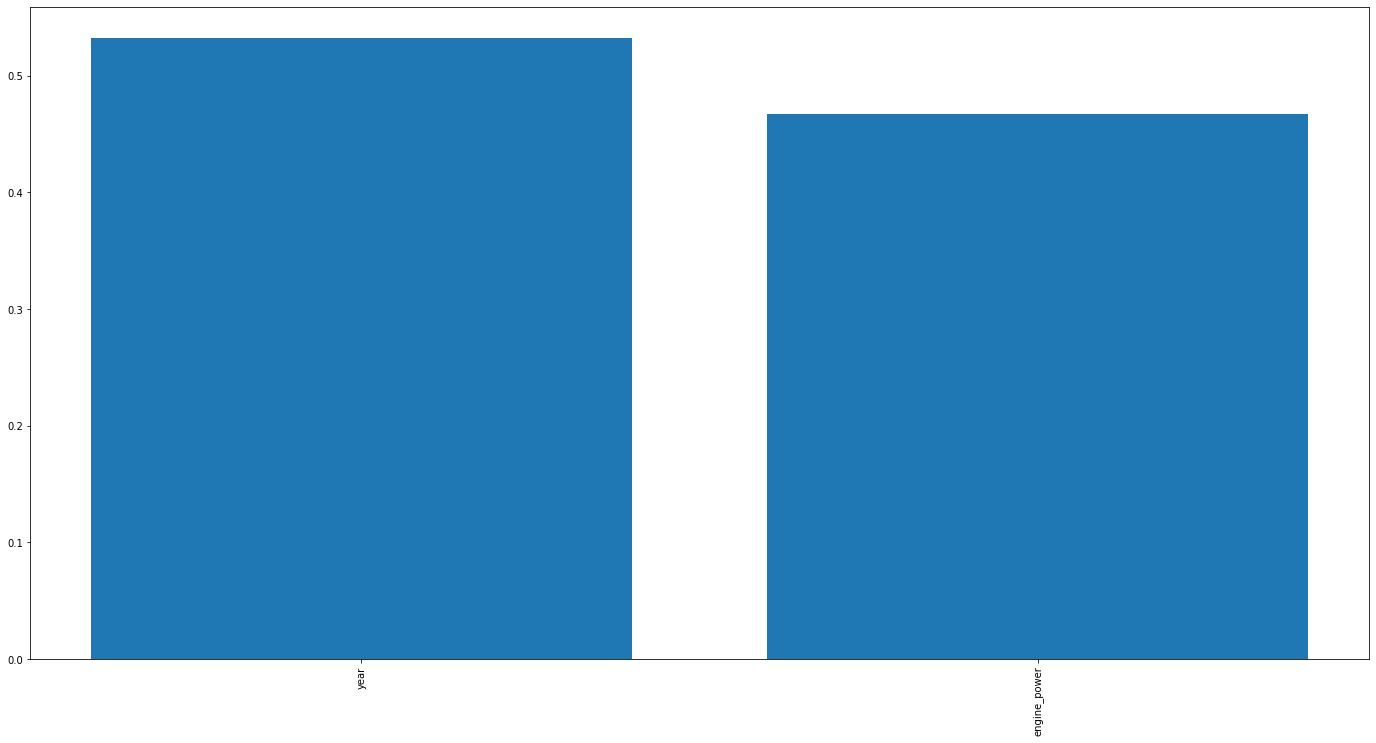

In [145]:
importances = rf_random.best_estimator_.feature_importances_
feature_names = [f'feature {i}' for i in range(X_test_mbf.shape[1])]

# what are scores for the features
for i in range(len(rf_random.best_estimator_.feature_importances_)):
    if rf_random.best_estimator_.feature_importances_[i] >0.001:
        print(f'{selected_feat[i]} : {round(rf_random.best_estimator_.feature_importances_[i],3)}')

print()

plt.bar([selected_feat[i] for i in range(len(rf_random.best_estimator_.feature_importances_))],
        rf_random.best_estimator_.feature_importances_)
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (24,12)
plt.show()

In [146]:
from xgboost import XGBRegressor
from matplotlib import pyplot

# fit model on training data
xgb_model = XGBRegressor(n_estimators=1000,
                         objective='reg:squarederror'
                        )
#eval_set = [(X_train, y_train)]
eval_set = [(X_train, y_train),(X_test, y_test)]
xgb_model.fit(X_train,
              y_train,
              early_stopping_rounds=10,
              eval_set=eval_set,
              verbose=True)

[0]	validation_0-rmse:72366.53402	validation_1-rmse:74181.33283
[1]	validation_0-rmse:53791.67731	validation_1-rmse:55702.15743
[2]	validation_0-rmse:41073.90739	validation_1-rmse:42980.96922
[3]	validation_0-rmse:32832.85486	validation_1-rmse:34753.19896
[4]	validation_0-rmse:27477.52611	validation_1-rmse:29415.80305


/opt/anaconda3/envs/otomoto_crawler/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-rmse:24165.39246	validation_1-rmse:26247.70534
[6]	validation_0-rmse:21863.65618	validation_1-rmse:23900.75640
[7]	validation_0-rmse:20555.44029	validation_1-rmse:22671.05087
[8]	validation_0-rmse:19432.52458	validation_1-rmse:21635.14506
[9]	validation_0-rmse:18804.78922	validation_1-rmse:21091.68283
[10]	validation_0-rmse:18363.39584	validation_1-rmse:20761.63921
[11]	validation_0-rmse:18101.52047	validation_1-rmse:20510.88430
[12]	validation_0-rmse:17933.73718	validation_1-rmse:20369.78672
[13]	validation_0-rmse:17390.79886	validation_1-rmse:19952.06824
[14]	validation_0-rmse:17195.35819	validation_1-rmse:19841.54784
[15]	validation_0-rmse:17093.59182	validation_1-rmse:19744.80879
[16]	validation_0-rmse:16785.16651	validation_1-rmse:19474.00600
[17]	validation_0-rmse:16604.92488	validation_1-rmse:19354.92782
[18]	validation_0-rmse:16438.80153	validation_1-rmse:19185.08466
[19]	validation_0-rmse:16388.36807	validation_1-rmse:19136.40214
[20]	validation_0-rmse:16262.1

[131]	validation_0-rmse:11387.06582	validation_1-rmse:16853.08028
[132]	validation_0-rmse:11367.85554	validation_1-rmse:16846.87079
[133]	validation_0-rmse:11327.26499	validation_1-rmse:16864.05451
[134]	validation_0-rmse:11316.75021	validation_1-rmse:16863.80567
[135]	validation_0-rmse:11307.08483	validation_1-rmse:16856.84875
[136]	validation_0-rmse:11295.45527	validation_1-rmse:16846.61917
[137]	validation_0-rmse:11276.73050	validation_1-rmse:16848.64247
[138]	validation_0-rmse:11271.41583	validation_1-rmse:16844.70047
[139]	validation_0-rmse:11260.82400	validation_1-rmse:16842.06399
[140]	validation_0-rmse:11231.64975	validation_1-rmse:16836.78467
[141]	validation_0-rmse:11213.76639	validation_1-rmse:16828.85570
[142]	validation_0-rmse:11199.70138	validation_1-rmse:16829.90055
[143]	validation_0-rmse:11175.38249	validation_1-rmse:16835.36277
[144]	validation_0-rmse:11164.95783	validation_1-rmse:16818.99127
[145]	validation_0-rmse:11138.26983	validation_1-rmse:16814.98919
[146]	vali

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

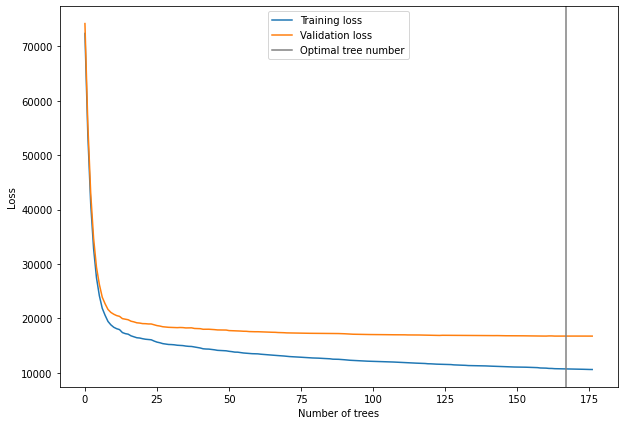

In [147]:
results = xgb_model.evals_result()

plt.figure(figsize=(10,7))
plt.plot(results["validation_0"]["rmse"], label="Training loss")
plt.plot(results["validation_1"]["rmse"], label="Validation loss")
plt.axvline(xgb_model.best_ntree_limit, color="gray", label="Optimal tree number")
plt.xlabel("Number of trees")
plt.ylabel("Loss")
plt.legend()

In [148]:
xgb_model.best_ntree_limit

167

[CV 2/2] END max_depth=50, min_samples_split=100, n_estimators=200;, score=0.858 total time=   5.3s
[CV 1/2] END max_depth=20, min_samples_split=500, n_estimators=1550;, score=0.827 total time=  34.8s
[CV 1/2] END max_depth=50, min_samples_split=100, n_estimators=200;, score=0.862 total time=   5.4s
[CV 2/2] END max_depth=20, min_samples_split=500, n_estimators=1550;, score=0.824 total time=  34.9s


In [149]:
y_xgb_train_pred = xgb_model.predict(X_train)
y_xgb_test_pred = xgb_model.predict(X_test)

[CV 2/2] END max_depth=20, min_samples_split=20, n_estimators=200;, score=0.873 total time=   6.0s
[CV 1/2] END max_depth=50, min_samples_split=50, n_estimators=1550;, score=0.867 total time=  44.2s
[CV 1/2] END max_depth=20, min_samples_split=20, n_estimators=200;, score=0.872 total time=   6.1s
[CV 2/2] END max_depth=50, min_samples_split=50, n_estimators=1550;, score=0.867 total time=  44.4s
[CV 2/2] END max_depth=50, min_samples_split=20, n_estimators=1100;, score=0.874 total time=  34.1s
[CV 1/2] END max_depth=20, min_samples_split=100, n_estimators=1100;, score=0.862 total time=  25.2s
[CV 1/2] END max_depth=50, min_samples_split=20, n_estimators=1100;, score=0.872 total time=  34.3s
[CV 2/2] END max_depth=20, min_samples_split=100, n_estimators=1100;, score=0.858 total time=  25.1s


In [150]:
mse_train = metrics.mean_squared_error(y_train, y_xgb_train_pred)
mae_train = metrics.mean_absolute_error(y_train, y_xgb_train_pred)
rmse_train = np.sqrt(mse_train)

print(f"Training prediction results: \n MSE: {mse_train} \n MAE: {mae_train} \n RMSE: {rmse_train}")

Training prediction results: 
 MSE: 114706336.83135994 
 MAE: 6448.004712816174 
 RMSE: 10710.104426725256


In [152]:
mse_train = metrics.mean_squared_error(y_test, y_xgb_test_pred)
mae_train = metrics.mean_absolute_error(y_test, y_xgb_test_pred)
rmse_train = np.sqrt(mse_train)

print(f"Training prediction results: \n MSE: {mse_train} \n MAE: {mae_train} \n RMSE: {rmse_train}")

Training prediction results: 
 MSE: 280023821.55242825 
 MAE: 7976.621280688377 
 RMSE: 16733.912320567124


/opt/anaconda3/envs/otomoto_crawler/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Actual Vs Predicted value')

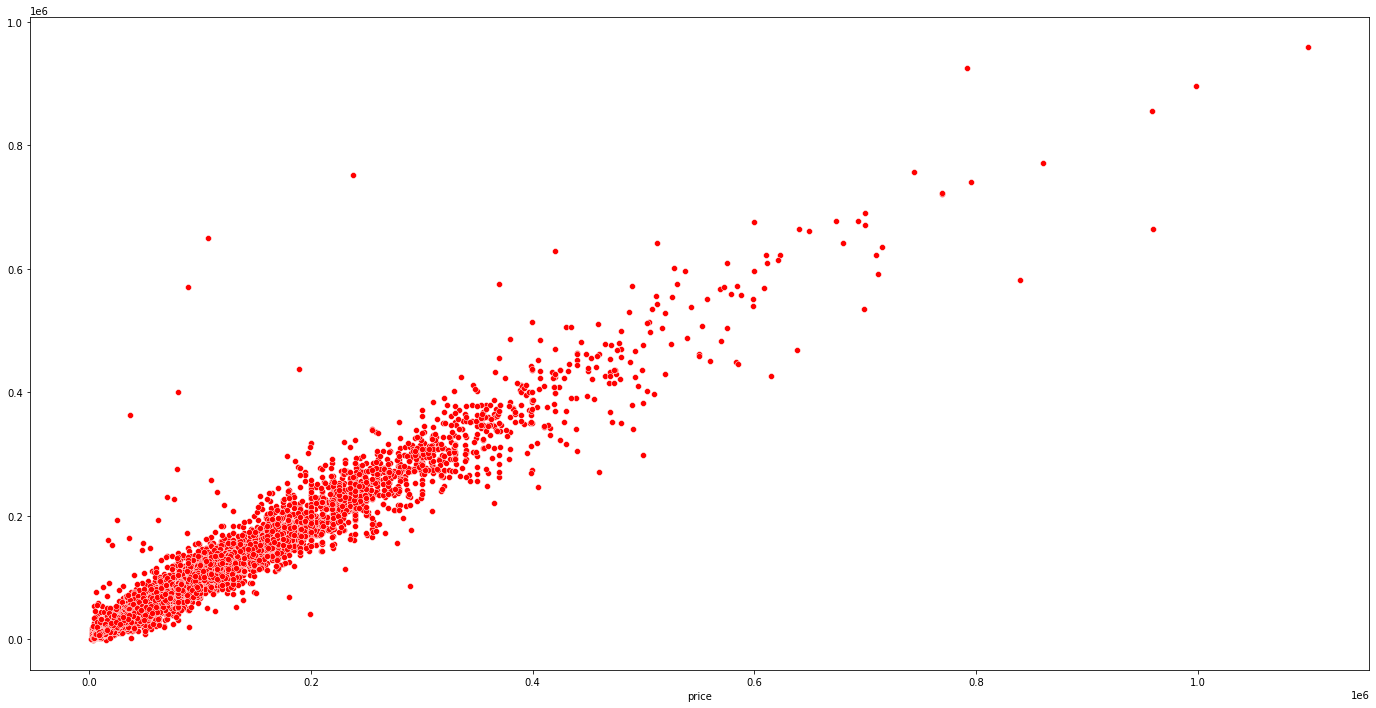

In [153]:
# Check for Linearity
#f = plt.figure(figsize=(20, 10))
sns.scatterplot(y_test, y_xgb_test_pred, color="r")
#sns.regplot(y_test, y_pred_test_rf, color='r')
ax.set_title("Actual Vs Predicted value")

In [154]:
# save
xgb_model.save_model("xgboost_model_wo_features_newest.json")

# load
#new_model = xgb.XGBRegressor()
#new_model.laod_model("my_xgboost.json")

# check optimal number of trees of loaded model
#new_model.best_ntree_limit

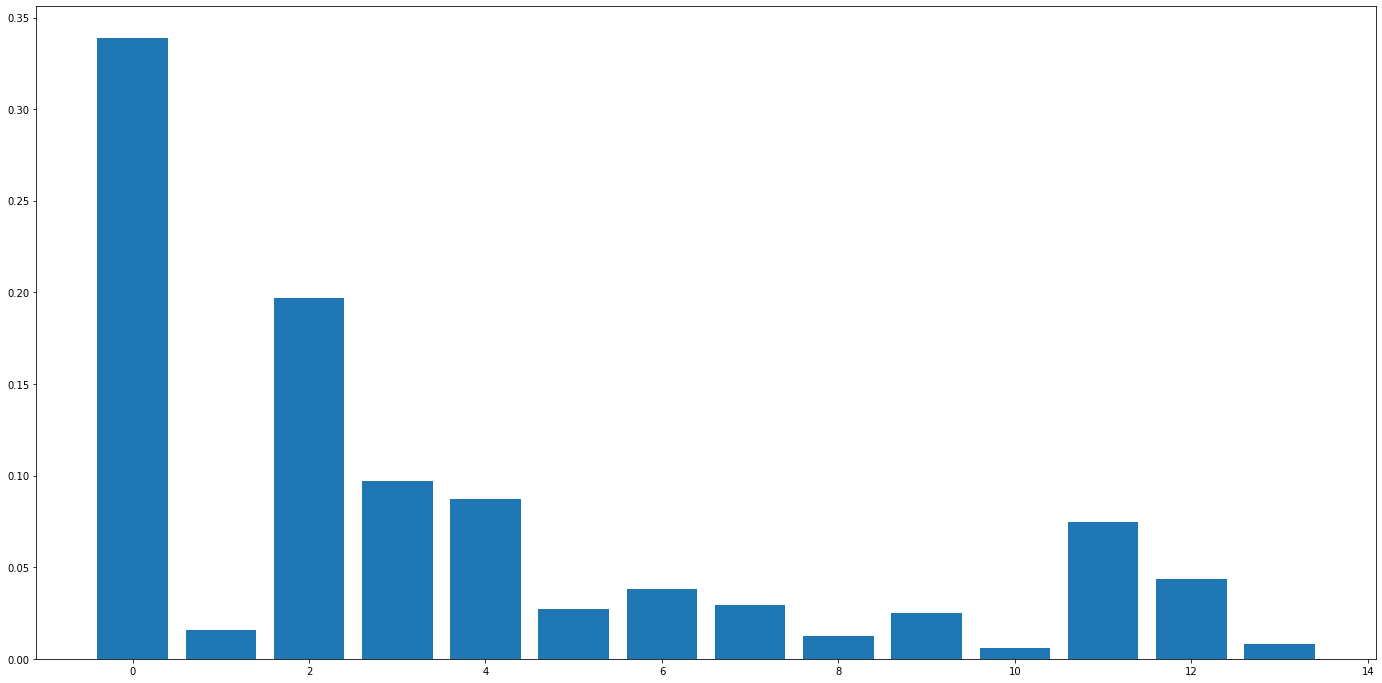

In [155]:
# plot
plt.bar(range(len(xgb_model.feature_importances_)), xgb_model.feature_importances_)
plt.show()

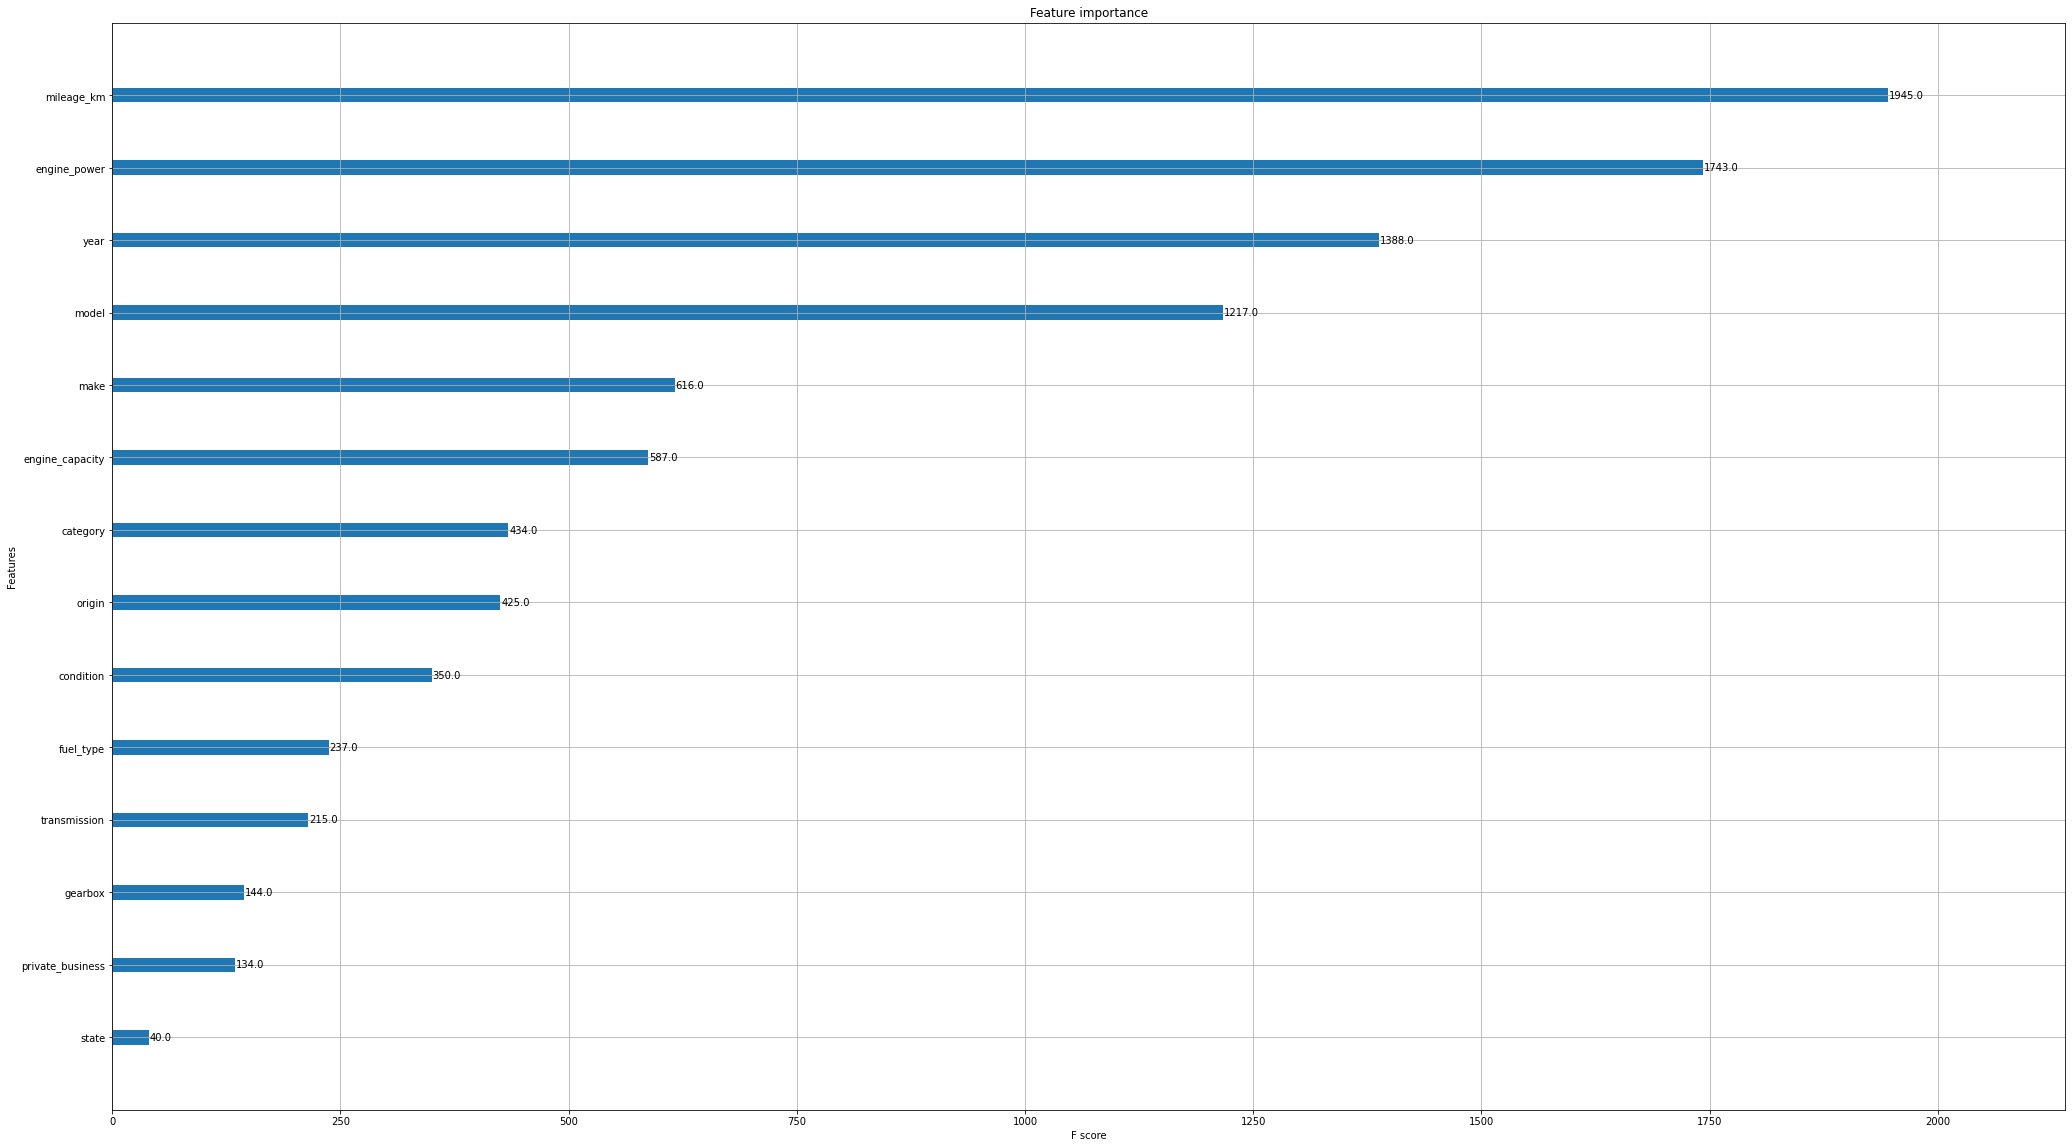

In [156]:
from xgboost import plot_importance
# plot feature importance
plt.rcParams["figure.figsize"] = (35,20)


plot_importance(xgb_model)
plt.show()

In [157]:
# Fit model using each importance as a threshold
thresholds = np.sort(xgb_model.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(xgb_model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    # train model
    selection_model = XGBRegressor()
    selection_model.fit(select_X_train, y_train)
    # eval model
    select_X_test = selection.transform(X_test)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))
    print("Thresh=%.3f, n=%d, RMSE: %.2f" % (thresh, select_X_train.shape[1], rmse))

Thresh=0.006, n=14, RMSE: 17027.53
Thresh=0.008, n=13, RMSE: 17000.19
Thresh=0.012, n=12, RMSE: 17505.55
Thresh=0.016, n=11, RMSE: 18437.11
Thresh=0.025, n=10, RMSE: 18721.91
Thresh=0.027, n=9, RMSE: 19314.48
Thresh=0.029, n=8, RMSE: 19416.45
Thresh=0.038, n=7, RMSE: 20799.89
Thresh=0.043, n=6, RMSE: 21159.67
Thresh=0.075, n=5, RMSE: 21544.65
Thresh=0.087, n=4, RMSE: 22000.87
Thresh=0.097, n=3, RMSE: 23481.18
Thresh=0.197, n=2, RMSE: 26155.20
Thresh=0.339, n=1, RMSE: 55834.94


In [158]:
from sklearn.feature_selection import SelectFromModel


# select features using threshold
selection = SelectFromModel(xgb_model, threshold=0.02, prefit=True)
features_selected = selection.get_support(indices=True)
final_features = []
for i, value in enumerate(X_train.columns):
    if i in features_selected:
        final_features.append(value)

select_X_train = selection.transform(X_train)
select_X_test = selection.transform(X_test)

# fit model on training data
selection_xgb_model = XGBRegressor(n_estimators=10000,
                                   objective='reg:squarederror'
                        )
selection_eval_set = [(select_X_train, y_train),(select_X_test, y_test)]
selection_xgb_model.fit(select_X_train,
              y_train,
              early_stopping_rounds=100,
              eval_set=selection_eval_set,
              verbose=True)


# eval model
y_select_xgb_training = selection_xgb_model.predict(select_X_train)
y_select_xgb_test = selection_xgb_model.predict(select_X_test)

print(np.sqrt(metrics.mean_squared_error(y_train, y_select_xgb_training)))
print(np.sqrt(metrics.mean_squared_error(y_test, y_select_xgb_test)))

[0]	validation_0-rmse:72370.73395	validation_1-rmse:74180.60432
[1]	validation_0-rmse:53849.58986	validation_1-rmse:55623.92308
[2]	validation_0-rmse:41465.14448	validation_1-rmse:43311.54433
[3]	validation_0-rmse:33164.52305	validation_1-rmse:34989.55987
[4]	validation_0-rmse:27994.14536	validation_1-rmse:29820.63391
[5]	validation_0-rmse:24671.92446	validation_1-rmse:26463.31715


/opt/anaconda3/envs/otomoto_crawler/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-rmse:22699.12893	validation_1-rmse:24560.05519
[7]	validation_0-rmse:21421.70947	validation_1-rmse:23312.29264
[8]	validation_0-rmse:20701.85375	validation_1-rmse:22637.74589
[9]	validation_0-rmse:19983.53197	validation_1-rmse:21914.48258
[10]	validation_0-rmse:19460.03923	validation_1-rmse:21509.85332
[11]	validation_0-rmse:19128.39014	validation_1-rmse:21221.63771
[12]	validation_0-rmse:18917.62560	validation_1-rmse:21048.25322
[13]	validation_0-rmse:18633.93791	validation_1-rmse:20762.78789
[14]	validation_0-rmse:18499.12285	validation_1-rmse:20630.58131
[15]	validation_0-rmse:18371.15557	validation_1-rmse:20532.59716
[16]	validation_0-rmse:18219.24493	validation_1-rmse:20431.57532
[17]	validation_0-rmse:18120.32631	validation_1-rmse:20359.43240
[18]	validation_0-rmse:18065.55414	validation_1-rmse:20365.11035
[19]	validation_0-rmse:18004.17595	validation_1-rmse:20318.64481
[20]	validation_0-rmse:17979.48105	validation_1-rmse:20316.45149
[21]	validation_0-rmse:17918.

[132]	validation_0-rmse:14630.20290	validation_1-rmse:18654.14904
[133]	validation_0-rmse:14610.99544	validation_1-rmse:18627.51595
[134]	validation_0-rmse:14588.55077	validation_1-rmse:18644.20909
[135]	validation_0-rmse:14586.61727	validation_1-rmse:18645.84574
[136]	validation_0-rmse:14571.02686	validation_1-rmse:18635.45655
[137]	validation_0-rmse:14553.46630	validation_1-rmse:18647.33404
[138]	validation_0-rmse:14543.67646	validation_1-rmse:18655.22946
[139]	validation_0-rmse:14539.22717	validation_1-rmse:18655.64632
[140]	validation_0-rmse:14535.18940	validation_1-rmse:18656.62971
[141]	validation_0-rmse:14530.77078	validation_1-rmse:18654.15942
[142]	validation_0-rmse:14521.37681	validation_1-rmse:18649.27460
[143]	validation_0-rmse:14505.81709	validation_1-rmse:18645.47401
[144]	validation_0-rmse:14482.31458	validation_1-rmse:18639.68556
[145]	validation_0-rmse:14469.33245	validation_1-rmse:18640.27923
[146]	validation_0-rmse:14458.13430	validation_1-rmse:18634.64414
[147]	vali

[257]	validation_0-rmse:13598.30179	validation_1-rmse:18661.02597
[258]	validation_0-rmse:13589.97048	validation_1-rmse:18656.33482
[259]	validation_0-rmse:13578.85904	validation_1-rmse:18652.78316
[260]	validation_0-rmse:13574.87076	validation_1-rmse:18649.81559
[261]	validation_0-rmse:13570.30761	validation_1-rmse:18654.17451
[262]	validation_0-rmse:13568.37405	validation_1-rmse:18659.75700
[263]	validation_0-rmse:13567.77208	validation_1-rmse:18658.08021
[264]	validation_0-rmse:13560.96515	validation_1-rmse:18664.56595
[265]	validation_0-rmse:13555.95783	validation_1-rmse:18661.34662
[266]	validation_0-rmse:13551.59306	validation_1-rmse:18664.00134
[267]	validation_0-rmse:13541.10849	validation_1-rmse:18665.72615
[268]	validation_0-rmse:13535.40316	validation_1-rmse:18674.43439
[269]	validation_0-rmse:13532.90453	validation_1-rmse:18668.81645
[270]	validation_0-rmse:13530.41844	validation_1-rmse:18665.71442
[271]	validation_0-rmse:13527.37889	validation_1-rmse:18671.31121
[272]	vali

In [159]:
final_features

['year',
 'engine_power',
 'engine_capacity',
 'condition',
 'state',
 'fuel_type',
 'make',
 'category',
 'gearbox',
 'transmission']

In [160]:
# save
selection_xgb_model.save_model("feature_selection_xgb_model_wo_featuers_newest.json")

In [161]:
X_train[final_features]

,year,engine_power,engine_capacity,condition,state,fuel_type,make,category,gearbox,transmission
0,2017,190.0,2400.0,1,1,3,8,7,0,2
1,2006,105.0,1900.0,1,1,0,30,3,1,2
2,2008,233.0,3000.0,1,1,0,1,2,0,1
3,2022,190.0,2000.0,2,0,3,30,2,0,2
4,2018,95.0,1500.0,1,1,0,7,2,1,2
...,...,...,...,...,...,...,...,...,...,...
79227,2017,136.0,1600.0,1,1,0,20,1,1,2
79228,2015,125.0,2000.0,2,1,0,29,8,1,1
79229,2008,115.0,2000.0,2,1,0,23,6,1,2
79230,2013,90.0,1500.0,1,1,0,5,1,1,2
